In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


C:\Users\amir\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_csv("F:\\IMDb Data\\Kaggle350\\AllMoviesDetailsCleaned.csv", sep=";", 
                 parse_dates=["release_date"])
print(df.columns)

C:\Users\amir\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.



Index(['id', 'budget', 'genres', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'production_companies_number',
       'production_countries_number', 'spoken_languages_number'],
      dtype='object')


In [4]:
df = df[["id","title","budget","genres","popularity","revenue","release_date"]] 
df = df.dropna(axis=0,how="any")
df = df[df.genres.str.contains("Romance|Comedy")]
print(df.shape)
df.head()

(63438, 7)


,id,title,budget,genres,popularity,revenue,release_date
1,3,Shadows in Paradise,0,Drama|Comedy,0.47445,0,1986-10-16
2,5,Four Rooms,4000000,Crime|Comedy,1.698,4300000,1995-12-25
8,13,Forrest Gump,55000000,Comedy|Drama|Romance,10.351236,677945399,1994-06-07
15,20,My Life Without Me,0,Drama|Romance,0.911462,9726954,2003-07-03
21,27,9 Songs,1000000,Drama|Music|Romance,2.939728,1574623,2004-07-16


In [5]:
df["popularity"] = pd.to_numeric(df['popularity'], errors='coerce')
df['release_date']= pd.to_datetime(df.release_date)
df['year']= df.release_date.dt.year
df['month']= df.release_date.dt.month
df.head()

,id,title,budget,genres,popularity,revenue,release_date,year,month
1,3,Shadows in Paradise,0,Drama|Comedy,0.474450,0,1986-10-16,1986,10
2,5,Four Rooms,4000000,Crime|Comedy,1.698000,4300000,1995-12-25,1995,12
8,13,Forrest Gump,55000000,Comedy|Drama|Romance,10.351236,677945399,1994-06-07,1994,6
15,20,My Life Without Me,0,Drama|Romance,0.911462,9726954,2003-07-03,2003,7
21,27,9 Songs,1000000,Drama|Music|Romance,2.939728,1574623,2004-07-16,2004,7


In [6]:
df["type"] = pd.np.where(df.genres.str.contains("Romance"),"Romance",
             pd.np.where(df.genres.str.contains("Comedy"),"Comedy","Other"))

df.head()

,id,title,budget,genres,popularity,revenue,release_date,year,month,type
1,3,Shadows in Paradise,0,Drama|Comedy,0.474450,0,1986-10-16,1986,10,Comedy
2,5,Four Rooms,4000000,Crime|Comedy,1.698000,4300000,1995-12-25,1995,12,Comedy
8,13,Forrest Gump,55000000,Comedy|Drama|Romance,10.351236,677945399,1994-06-07,1994,6,Romance
15,20,My Life Without Me,0,Drama|Romance,0.911462,9726954,2003-07-03,2003,7,Romance
21,27,9 Songs,1000000,Drama|Music|Romance,2.939728,1574623,2004-07-16,2004,7,Romance


In [7]:
df = df[(df.year < 2018)]

In [8]:
data = pd.DataFrame(df.groupby(["year","type"], sort=True)['popularity'].mean()).reset_index()
# data.head()
df1 = df[df.revenue !=0]
df1["revenue"] = df1["revenue"]/1000000
# df1.head()
data1= pd.DataFrame(df1.groupby(["year","type"],sort=True)['revenue'].mean()).reset_index()
# data1
df2= df[df.budget !=0] 
df2["budget"] = df2["budget"]/1000000 
data2=pd.DataFrame(df2.groupby(["year","type"],sort=True)['budget'].mean()).reset_index()
# data2
data3= pd.DataFrame(df.groupby(["year","type"],sort=True)['id'].count()).reset_index()
# data3

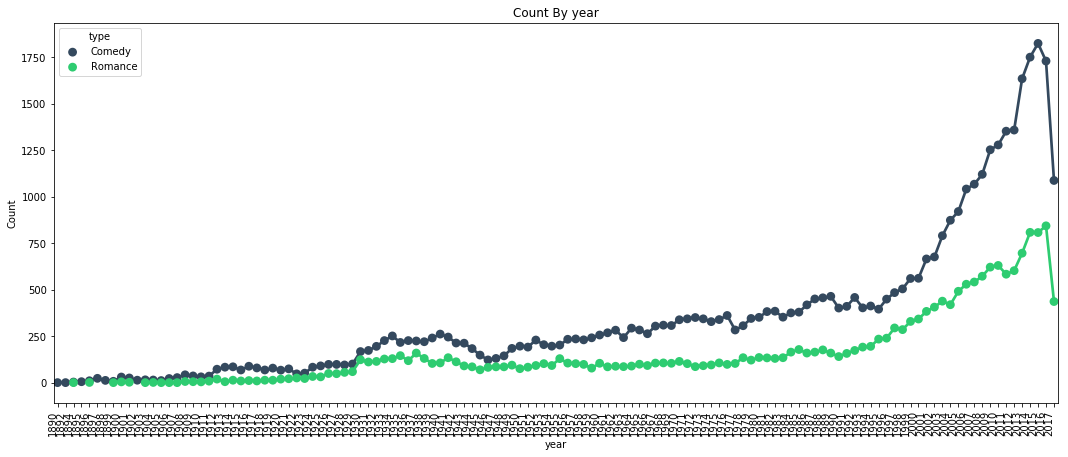

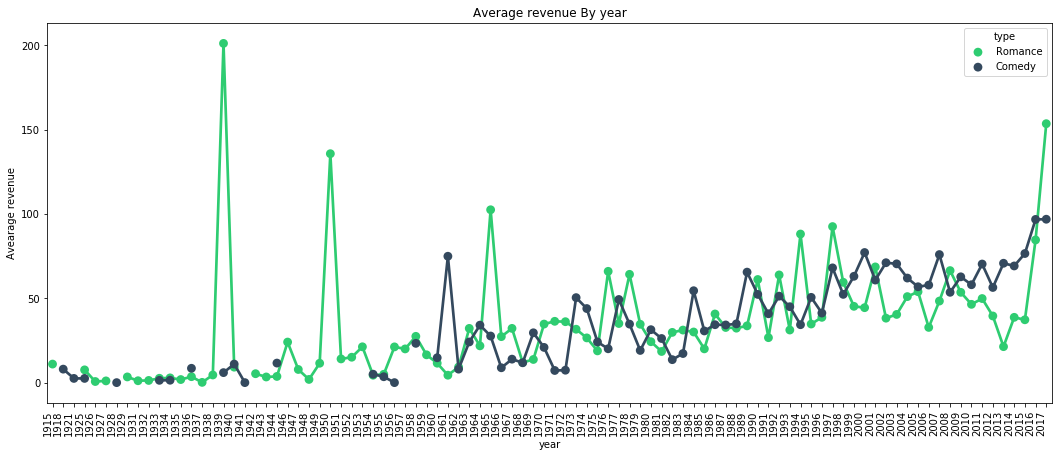

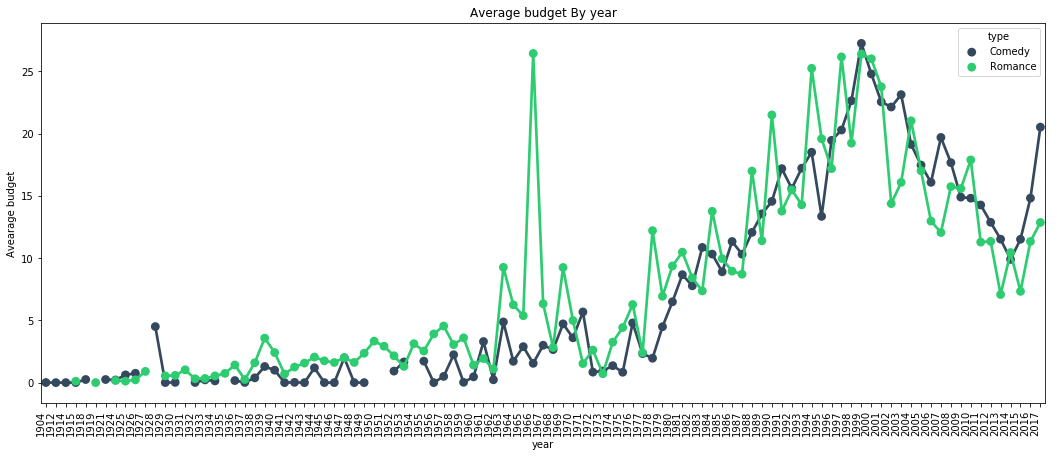

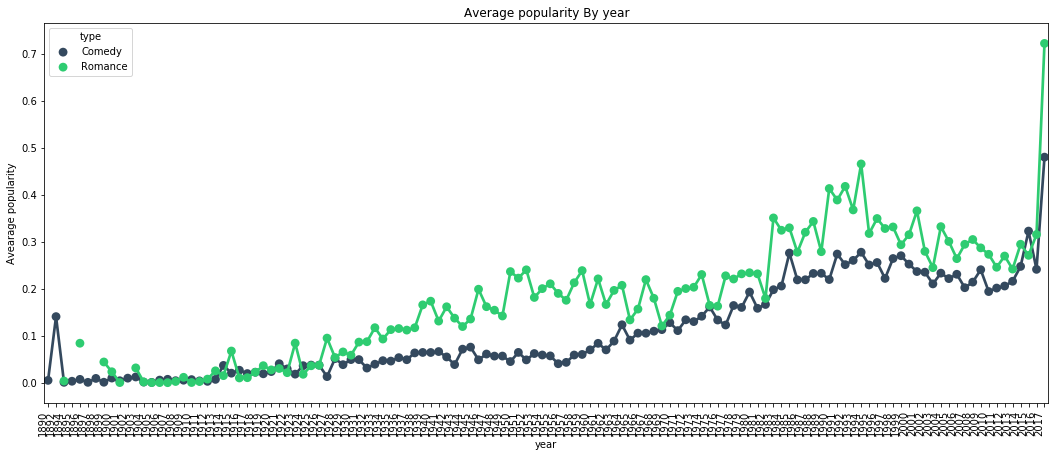

In [9]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches(18, 7)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
sns.pointplot(x=data3["year"], y=data3["id"],hue=data3["type"], data=data3,
                join=True, palette={"Romance": "#2ecc71", "Comedy": "#34495e"},ax=ax) 
ax.set(xlabel='year', ylabel='Count',title="Count By year")


fig, ax1 = plt.subplots()
fig.set_size_inches(18, 7)

ax1.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
sns.pointplot(x=data1["year"], y=data1["revenue"],hue=data1["type"], 
               palette={"Romance": "#2ecc71", "Comedy": "#34495e"},data=data1,join=True,ax=ax1)
ax1.set(xlabel='year', ylabel='Avearage revenue',title="Average revenue By year")


fig, ax2 = plt.subplots()
fig.set_size_inches(18, 7)
ax2.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
sns.pointplot(x=data2["year"], y=data2["budget"],hue=data2["type"],
               palette={"Romance": "#2ecc71", "Comedy": "#34495e"},data=data2,join=True,ax=ax2)
ax2.set(xlabel='year', ylabel='Avearage budget',title="Average budget By year")


fig, ax0 = plt.subplots()
fig.set_size_inches(18, 7)
ax0.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
sns.pointplot(x=data["year"], y=data["popularity"],hue=data["type"],
               palette={"Romance": "#2ecc71", "Comedy": "#34495e"}, data=data,join=True,ax=ax0)
ax0.set(xlabel='year', ylabel='Avearage popularity',title="Average popularity By year")
plt.show()